In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
data={'+':np.array([[1,2],[2,3],[3,1.5],[1,2.5]]),'*':np.array([[4,5],[5,6],[7,5.5],[5,6.6]])}
data

{'+': array([[1. , 2. ],
        [2. , 3. ],
        [3. , 1.5],
        [1. , 2.5]]), '*': array([[4. , 5. ],
        [5. , 6. ],
        [7. , 5.5],
        [5. , 6.6]])}

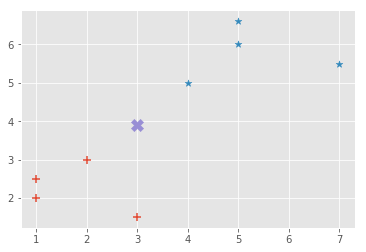

In [34]:
for i in data:
    plt.scatter(data[i][:,0],data[i][:,1],marker=i,s=50)
plt.scatter(3,3.9,marker='X',s=150)

for i in data:
    plt.scatter(data[i][:,0],data[i][:,1],marker=i,s=50)
plt.scatter(3,3.9,marker='X',s=150)

In [41]:
for i in data:
    for pt in data[i]:
        print(pt)
    

[1. 2.]
[2. 3.]
[3.  1.5]
[1.  2.5]
[4. 5.]
[5. 6.]
[7.  5.5]
[5.  6.6]


In [49]:
from collections import Counter

def knn(data,prd):
    dist=[]
    for i in data:
        for pt in data[i]:
            dist.append((np.linalg.norm(pt-prd),i))
    v=sorted(dist)[:3]
#     return(v)
    return Counter([i[1] for i in v]).most_common(1)[0][0]


knn(data,np.array([3,3.9]))



[(1.345362404707371, '+'), (1.4866068747318506, '*'), (2.4, '+')]

In [51]:
from scipy.spatial.distance import euclidean

In [52]:
import pandas as pd

data
prd=np.array([4,3.9])
def knn(data,prd):
    dist=[]
    for i in data:
        for pt in data[i]:
            dist.append((euclidean(pt,prd),i))
    v=sorted(dist)[:3]
    votes=[i[1] for i in v]
    d=dict(pd.Series(votes).value_counts())
    return max(d,key=d.get)
knn(data,np.array([4,3.9]))

'*'

In [ ]:
dts=pd.read_csv('ucicancer.csv')

In [ ]:
dts.columns

In [ ]:
dts.dtypes
dts.g=dts.g.replace('?',15)
dts.g=dts.g.astype(dtype=np.int64)

In [ ]:
dts.dtypes

In [ ]:
# dts.g=dts.g.astype(dtype=i)

In [92]:
from sklearn.model_selection import train_test_split


In [93]:
x=dts.drop(['Unnamed: 0','a','class'],axis=1)
y=dts['class']

In [94]:
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.2)


In [95]:
x_tr,y_tr

(      b   c   d   e   f   g   h   i   j
 27    2   1   1   1   2   1   2   1   1
 503   1   1   1   1   2   1   1   1   1
 283   7   4   5  10   2  10   3   8   2
 182   5   8   8   8   5  10   7   8   1
 226   8   9   9   5   3   5   7   7   1
 361   3   2   2   1   4   3   2   1   1
 687   4   1   1   1   2   1   1   1   1
 496   4   2   1   1   2   1   1   1   1
 269   8   4   7   1   3  10   3   9   2
 647   5  10  10  10  10   2  10  10  10
 549   3   1   1   1   2   1   2   1   1
 528   4   1   1   1   1   1   2   1   1
 164   4   1   1   1   2   2   3   2   1
 167   3   1   1   1   2   1   3   1   1
 34    2   1   1   1   2   1   2   1   1
 41    6  10  10   2   8  10   7   3   3
 216   1   1   1   1   2   1   3   1   1
 347   3   4   4  10   5   1   3   3   1
 119   1   1   2   2   2   1   3   1   1
 399   3  10   8   7   6   9   9   3   8
 432   3   2   2   3   2   1   1   1   1
 112  10  10  10   3  10   8   8   1   1
 462   4   1   1   1   2   1   1   2   1
 148   8   8   7

In [99]:
x_ts

,b,c,d,e,f,g,h,i,j
402,3,1,1,1,2,4,1,1,1
284,8,10,10,10,8,10,10,7,3
482,8,7,8,5,5,10,9,10,1
324,3,2,2,1,2,1,2,3,1
49,9,5,8,1,2,3,2,1,5
139,3,1,1,1,2,1,1,1,1
1,3,1,1,1,2,2,3,1,1
374,1,1,1,1,2,1,1,1,1
470,6,1,1,3,2,1,1,1,1
258,5,7,7,1,5,8,3,4,1


In [103]:
d=dict.fromkeys(y_tr)
for i in d:
    d[i]=[]
for i in range((x_tr).shape[0]):
    d[y_tr.iloc[i]].append(x_tr.iloc[i].values)


AttributeError: 'list' object has no attribute 'fromkeys'

In [ ]:
c=0
for i in range(len(x_ts)):
    if knn(d,x_ts.iloc[i])==y_ts.iloc[i]:
        c+=1
c/len(x_ts)

In [2]:
s="shani"
a="amit"

TypeError: 's' is an invalid keyword argument for this function